In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

#hot_100_load = Path("Data/hot_100.csv")
bb_500 = Path('Data/2021_list_raw.csv')

#hot_100_data = pd.read_csv(hot_100_load)
bb_500_df = pd.read_csv(bb_500)

#remove songid column
bb_500_df = bb_500_df.drop(columns=['songid'] + ['Edition'])

# remove and blanks
bb_500_df = bb_500_df.dropna(subset=['Released'])

#remove years 2018 to 2021
filtered_bb_500_df = bb_500_df[(bb_500_df['Released'] >= 1958) & (bb_500_df['Released'] < 2018)]

#Top 100 from the filtered list
filtered_bb_500_df = filtered_bb_500_df[:100]

print(filtered_bb_500_df.columns)

Index(['Rank', 'Artist', 'Song', 'Released'], dtype='object')


In [31]:
# Bin by decade 
bins = [1958, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1960-1969', '1970-1979', '1980-1989', '1990-1999','2000-2009', '2010-2019']

filtered_bb_500_df['Decade'] =pd.cut(filtered_bb_500_df['Released'], bins=bins, labels=labels, right=False)

#filtered_bb_500_df['Decade'] = filtered_bb_500_df['Decade'].astype(str)
print(filtered_bb_500_df.columns)

Index(['Rank', 'Artist', 'Song', 'Released', 'Decade'], dtype='object')


In [39]:
song_counts = filtered_bb_500_df.groupby('Decade')
song_counts.count()

C:\Users\WHPav\AppData\Local\Temp\ipykernel_6096\2596009765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  song_counts = filtered_bb_500_df.groupby('Decade')


,Rank,Artist,Song,Released
Decade,,,,
1960-1969,31,31,31,31
1970-1979,24,24,24,24
1980-1989,14,14,14,14
1990-1999,9,9,9,9
2000-2009,14,14,14,14
2010-2019,8,8,8,8


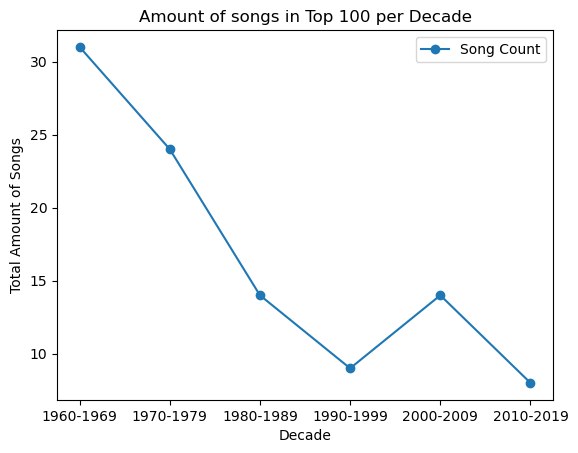

In [44]:
song_count_data = {'Decade': ['1960-1969', '1970-1979', '1980-1989', '1990-1999','2000-2009', '2010-2019'],
                   'Song Count': [31,24,14,9,14,8]
                  }
decade_df = pd.DataFrame(song_count_data)

decade_df.plot(kind='line', x='Decade', y='Song Count', marker='o')
plt.title('Amount of songs in Top 100 per Decade')
plt.ylabel('Total Amount of Songs')
plt.xlabel('Decade')
plt.show()

the r^2 value is:0.0915101802851934


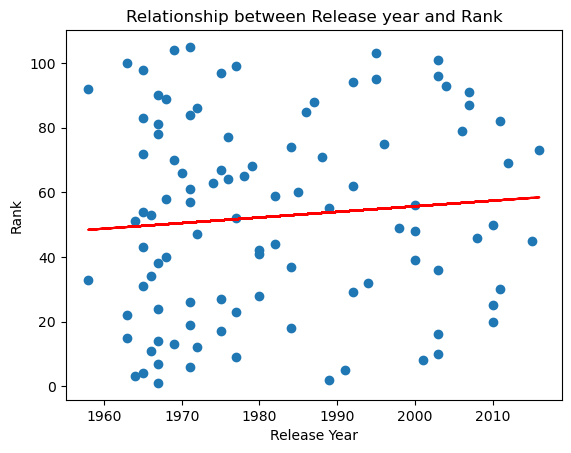

In [33]:
x_values = filtered_bb_500_df['Released']
y_values = filtered_bb_500_df['Rank']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(0,5), fontsize=15, color='red',)
plt.title('Relationship between Release year and Rank')
plt.xlabel('Release Year')
plt.ylabel('Rank')

print(f'the r^2 value is:{rvalue}')
plt.show()